# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
# Step 1.1: Determine Business Objectives

# Objective: Identify key factors influencing used car prices to optimize inventory and pricing strategies.
# Success Criteria: Provide actionable insights that increase sales or optimize inventory levels by accurately determining the factors that affect car pricing.

In [2]:
# Step 1.2: Assess Situation

# Resources: 
# - Access to historical sales data from the dealership.
# - Computing resources and data processing tools.

# Constraints:
# - Limited access to competitor pricing data.
# - Technological limitations regarding dataset size and processing power.

# Risks:
# - Potential data quality issues (e.g., missing or inconsistent data).
# - Mitigation includes thorough data cleansing and validation procedures.

In [3]:
# Step 1.3: Determine Data Mining Goals
# Goal: Develop a predictive model to estimate car prices based on attributes like year, mileage, and condition.
# Success Criteria: Achieve high predictive accuracy and ensure model interpretability to provide clear insights into the pricing factors.

In [41]:
# Step 1.4: Produce Project Plan

# Phases:
# 1. Data Understanding: Explore and summarize the dataset to identify key variables and data quality issues.
# 2. Data Preparation: Clean and preprocess the data to ensure it is suitable for modeling.
# 3. Modeling: Apply regression techniques to build predictive models.
# 4. Evaluation: Evaluate model performance using metrics such as RMSE to ensure accuracy.
# 5. Deployment: Implement the model within the dealership's pricing strategy framework.

# Tools and Techniques:
# - Python with pandas for data manipulation and scikit-learn for modeling.
# - Regression models such as linear regression or more advanced techniques.

In [58]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import winsorize

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [59]:
# Step 2.1: Collect Initial Data

# Load the dataset
data = pd.read_csv('data/vehicles.csv')

# Display the first few rows to get an initial look at the data
print("Initial rows of the dataset:")
data.head()

Initial rows of the dataset:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [60]:
# Step 2.2: Describe Data

# Get a summary of the dataset to understand its structure, data types, and missing values
print("Dataset Information:")
print(data.info())

# Generate descriptive statistics for numerical columns to understand central tendency, dispersion, and outliers
print("\nDescriptive Statistics:")
print(data.describe(include='all'))

# Count missing values in each column to identify potential data quality issues
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-nu

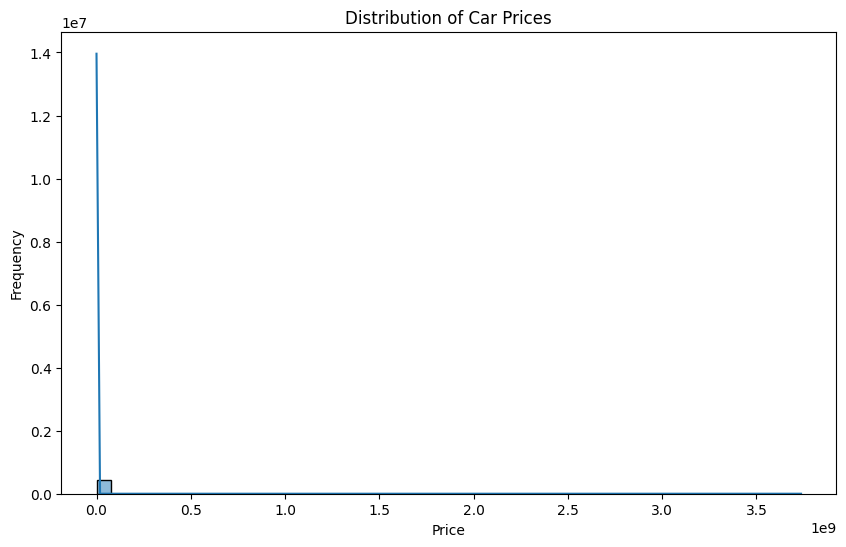

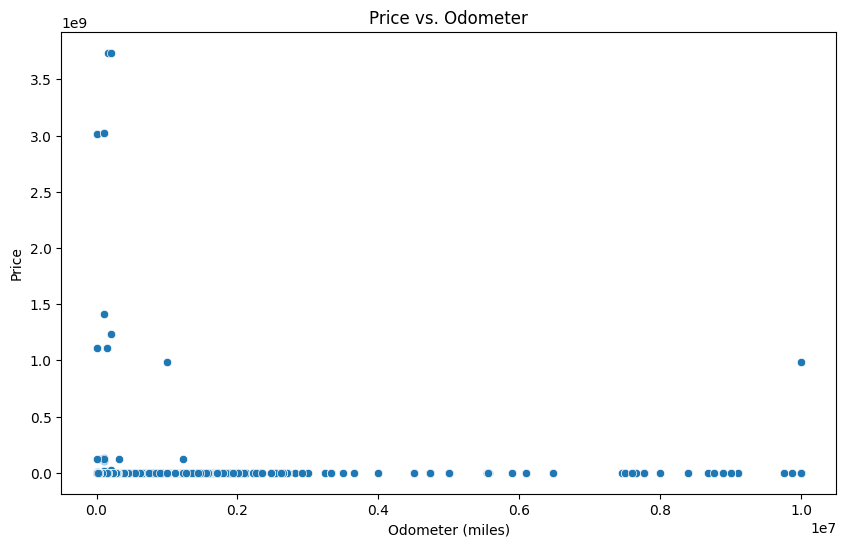

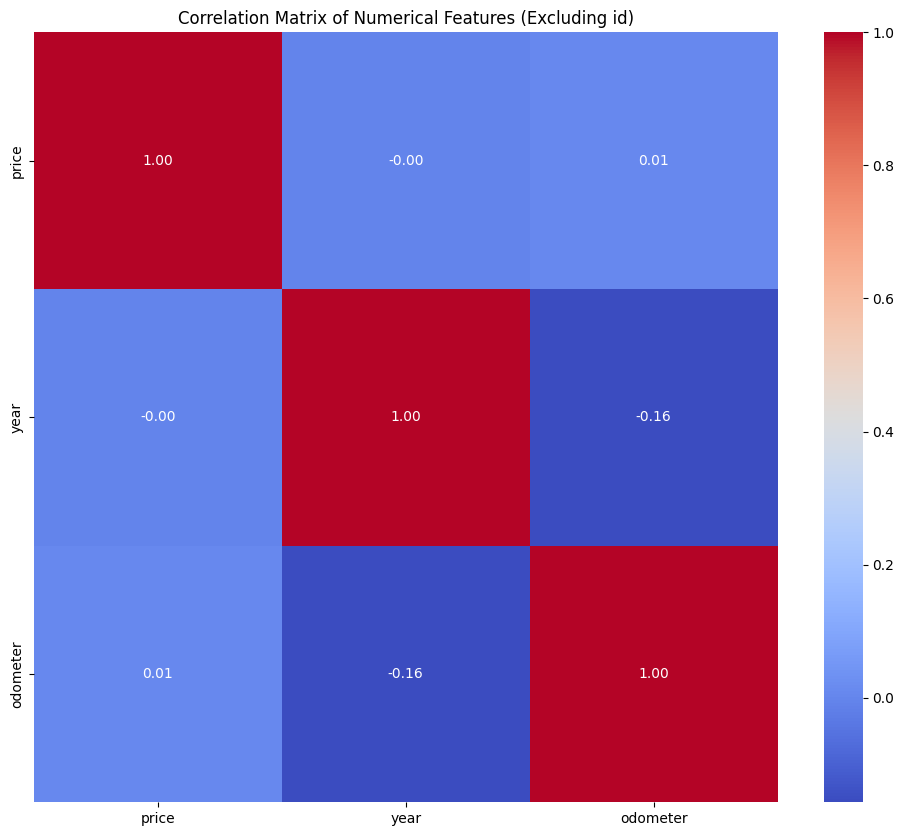

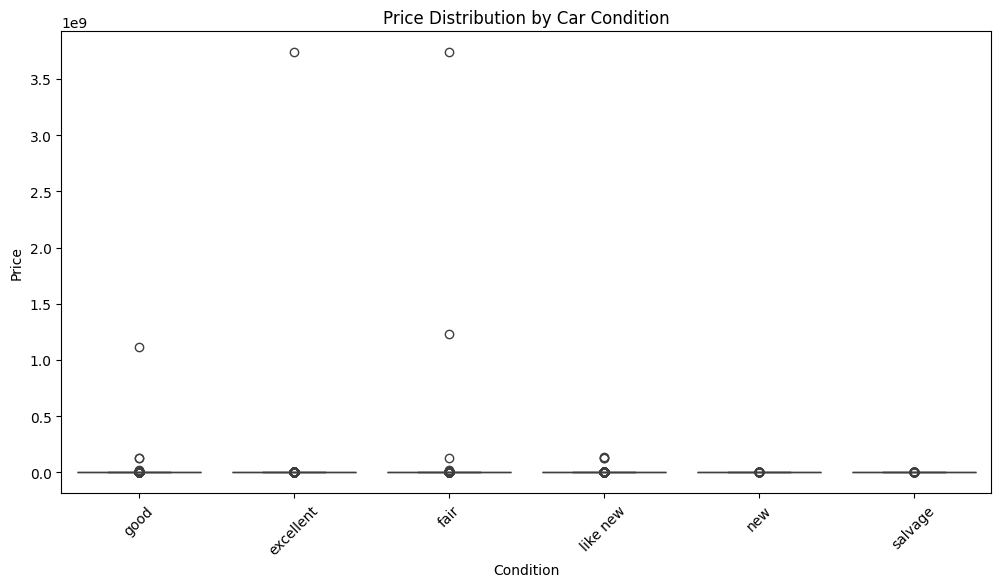

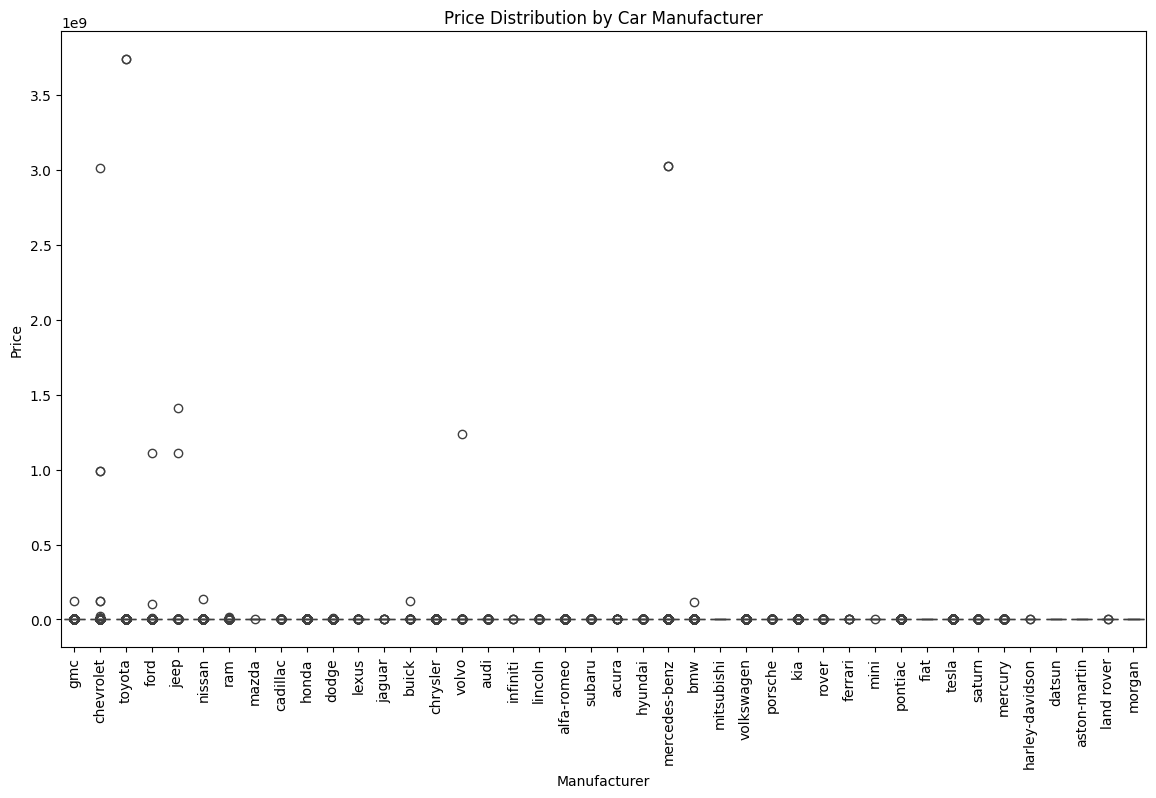


Price statistics by car condition:
   condition           mean   median           std
0  excellent   51346.825953  10995.0  1.173143e+07
1       fair  761090.005614   2800.0  4.785708e+07
2       good   32545.203102  19995.0  3.228826e+06
3   like new   36402.041978  13950.0  1.516449e+06
4        new   23657.266667  15900.0  2.689525e+04
5    salvage    3605.534110   1800.0  4.706320e+03

Price statistics by car manufacturer:
       manufacturer           mean   median           std
0             acura   19842.869522  18399.5  1.351444e+04
1        alfa-romeo   28237.348941  29590.0  8.042396e+03
2      aston-martin   53494.541667  46997.5  4.811093e+04
3              audi   23574.849993  23551.0  1.616050e+04
4               bmw   26740.261446  16495.0  9.357531e+05
5             buick   36784.954736  11399.0  1.664388e+06
6          cadillac   19439.520926  15995.0  1.586840e+04
7         chevrolet  115676.101645  14389.0  1.415957e+07
8          chrysler   10442.946609   7499.0  1

In [61]:
# Step 2.3: Explore Data

# 1. Visualize the distribution of the 'price' variable
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot to visualize the relationship between 'odometer' and 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['odometer'], y=data['price'])
plt.title('Price vs. Odometer')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price')
plt.show()

# 3. Correlation matrix to identify relationships between numerical features
# Exclude 'id' from the correlation matrix as it is just an identifier and holds no predictive power
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.drop('id')
correlation_matrix = data[numerical_columns].corr()

# 4. Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features (Excluding id)')
plt.show()

# 5. Analyze Subpopulations: Explore price variations by different categories

# Boxplot of 'price' by 'condition' to see how the condition affects the price
plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y='price', data=data)
plt.title('Price Distribution by Car Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Boxplot of 'price' by 'manufacturer' to see price differences among different car brands
plt.figure(figsize=(14, 8))
sns.boxplot(x='manufacturer', y='price', data=data)
plt.title('Price Distribution by Car Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

# 6. Aggregations: Calculate mean, median, and standard deviation of prices by car condition
price_by_condition = data.groupby('condition')['price'].agg(['mean', 'median', 'std']).reset_index()
print("\nPrice statistics by car condition:")
print(price_by_condition)

# 7. Aggregations: Calculate mean, median, and standard deviation of prices by manufacturer
price_by_manufacturer = data.groupby('manufacturer')['price'].agg(['mean', 'median', 'std']).reset_index()
print("\nPrice statistics by car manufacturer:")
print(price_by_manufacturer)


# Initial Findings and Hypotheses
# Based on the EDA performed, several initial findings and hypotheses can be proposed:

# 1. The distribution of car prices is highly skewed, with most cars priced at lower ranges.
# Hypothesis: There are potential outliers or incorrectly entered data points that need to be cleaned to ensure accurate modeling.

# 2. There is no strong linear relationship between price and year or odometer.
# Hypothesis: Price prediction might require more complex models that capture non-linear relationships, or additional variables may be needed to improve model accuracy.

# 3. The condition of the car and its manufacturer appear to significantly affect car prices.
# Hypothesis: Including categorical variables such as 'condition' and 'manufacturer' in the predictive model could improve accuracy.

# Impact on Project:
# These findings suggest that data cleaning (e.g., removing outliers) and feature selection (e.g., focusing on condition and manufacturer) will be important steps in the data preparation phase.
# Additionally, exploring non-linear modeling techniques may be necessary to capture complex relationships in the data.


Missing values in each column:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

Percentage of missing values in each column:
id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

Number of du

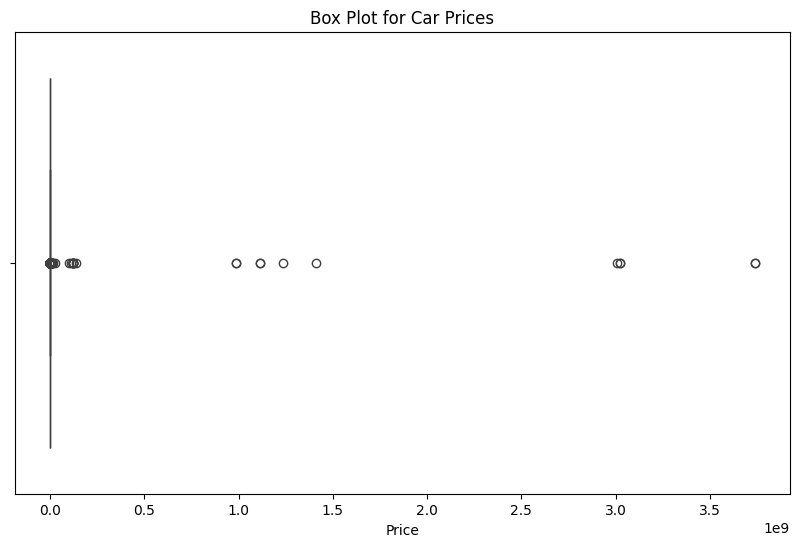

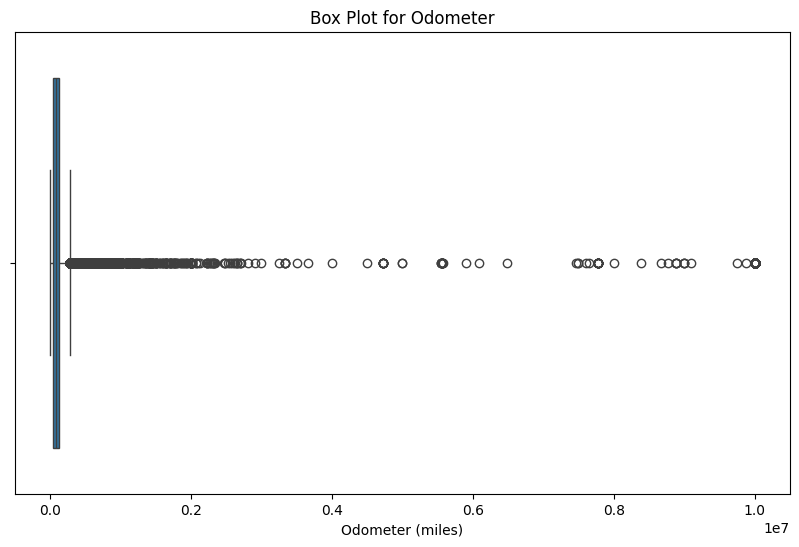

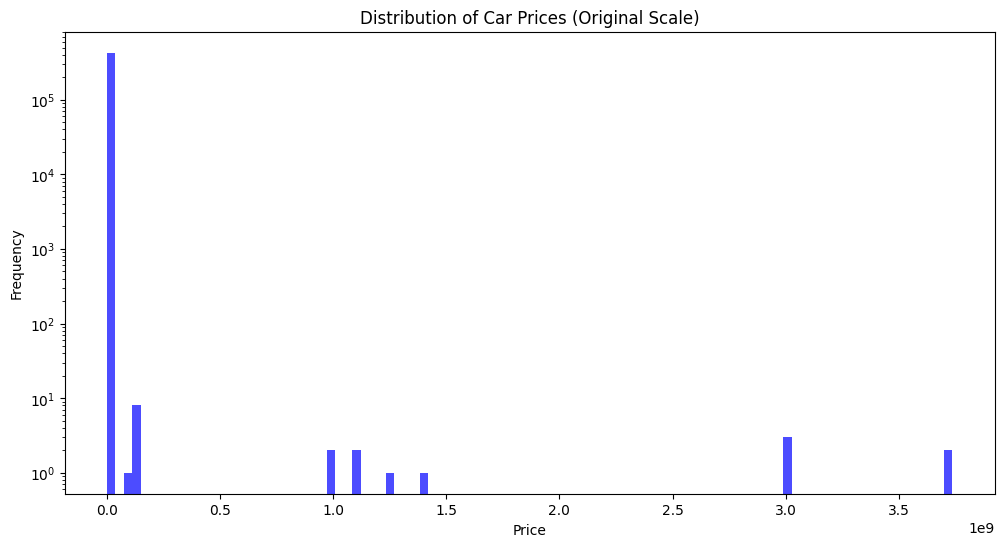

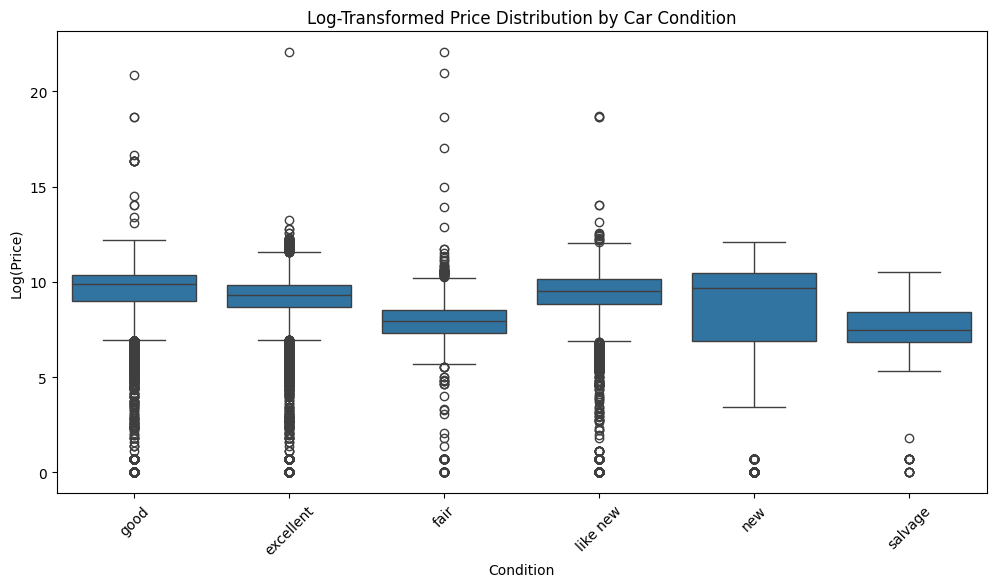

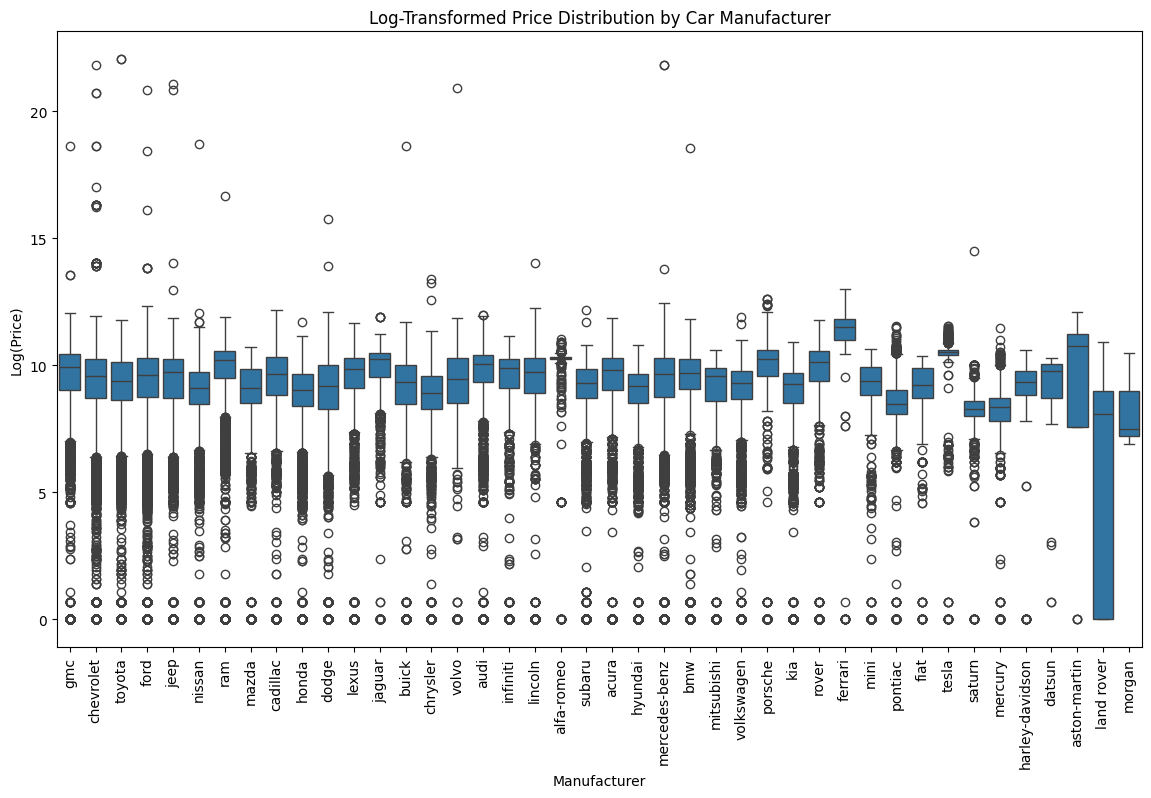

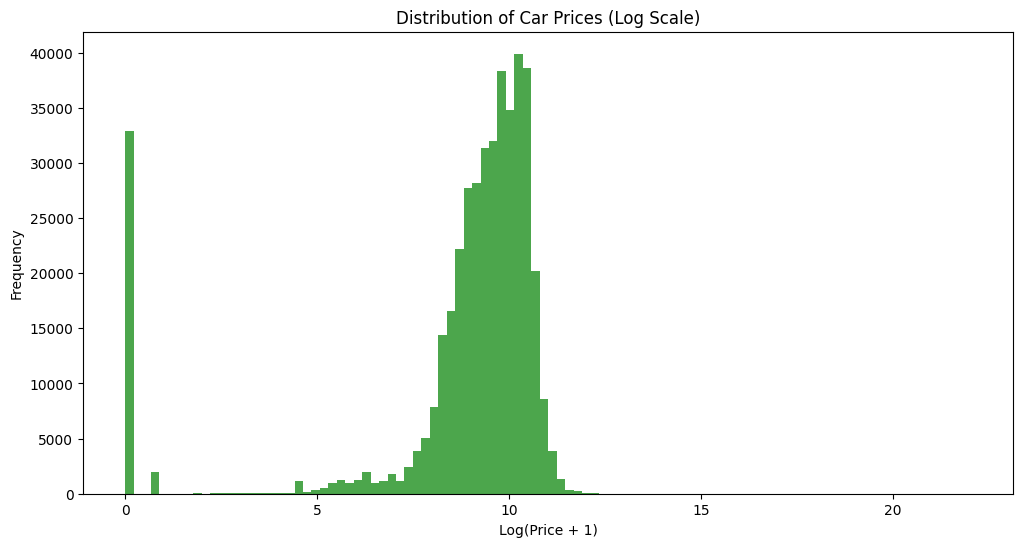

Number of low-price outliers: 32895
Number of high-price outliers: 21351

Descriptive statistics for low-price outliers:
                  id region    price          year manufacturer  model  \
count   3.289500e+04  32895  32895.0  32863.000000        31434  32319   
unique           NaN    383      NaN           NaN           40   4171   
top              NaN  salem      NaN           NaN         ford  f-150   
freq             NaN    780      NaN           NaN         6130    893   
mean    7.311552e+09    NaN      0.0   2013.973344          NaN    NaN   
std     4.484307e+06    NaN      0.0      6.359100          NaN    NaN   
min     7.209028e+09    NaN      0.0   1903.000000          NaN    NaN   
25%     7.308226e+09    NaN      0.0   2012.000000          NaN    NaN   
50%     7.312520e+09    NaN      0.0   2015.000000          NaN    NaN   
75%     7.315316e+09    NaN      0.0   2017.000000          NaN    NaN   
max     7.317081e+09    NaN      0.0   2022.000000          NaN  

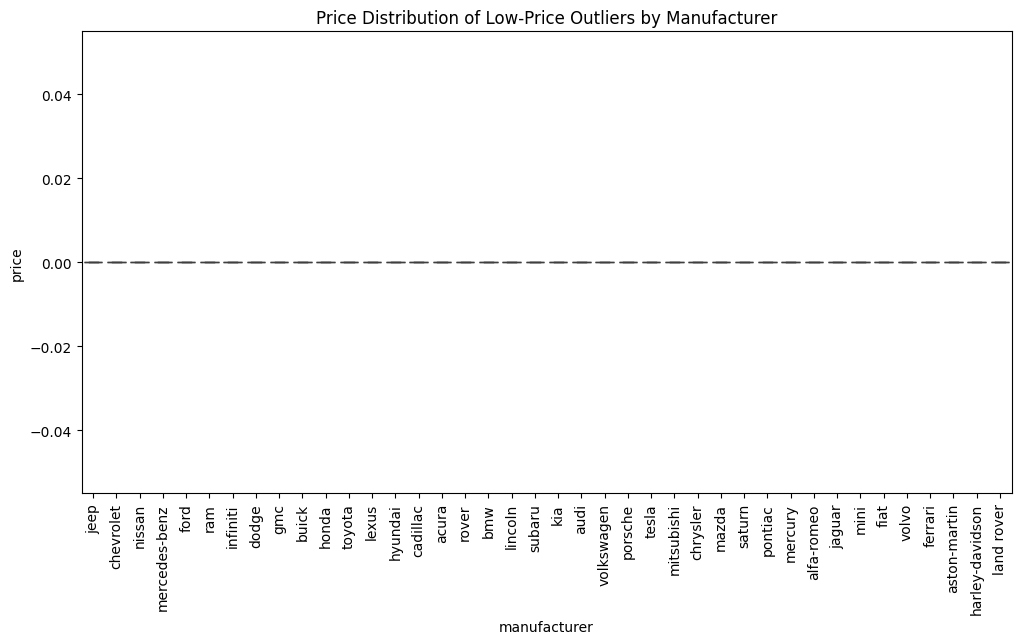

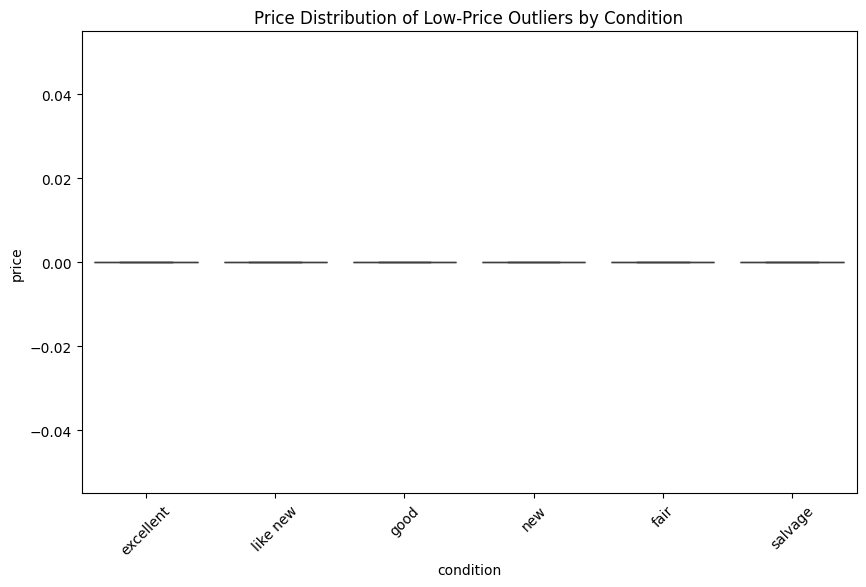

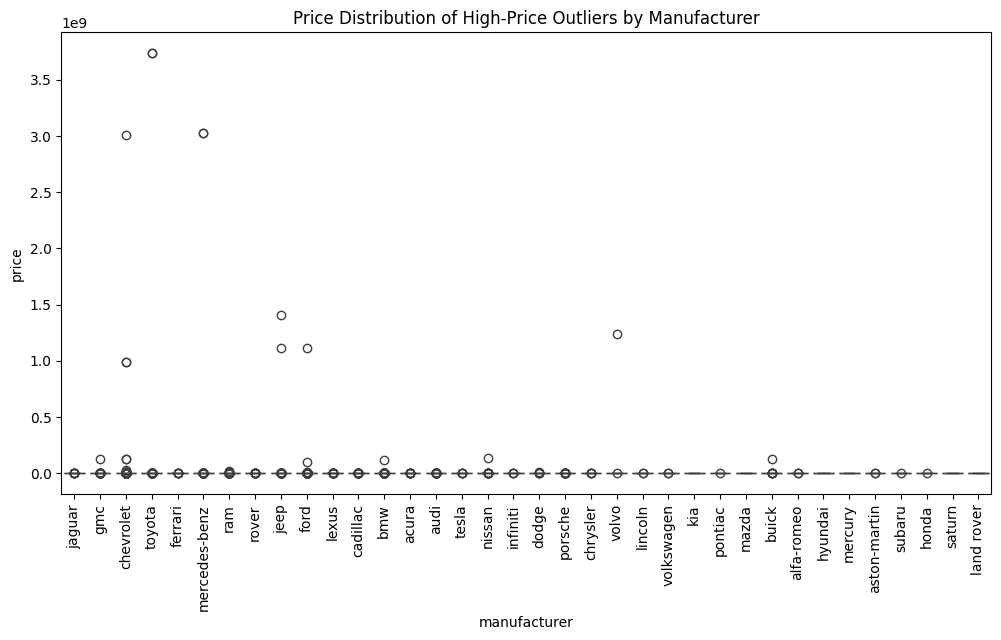

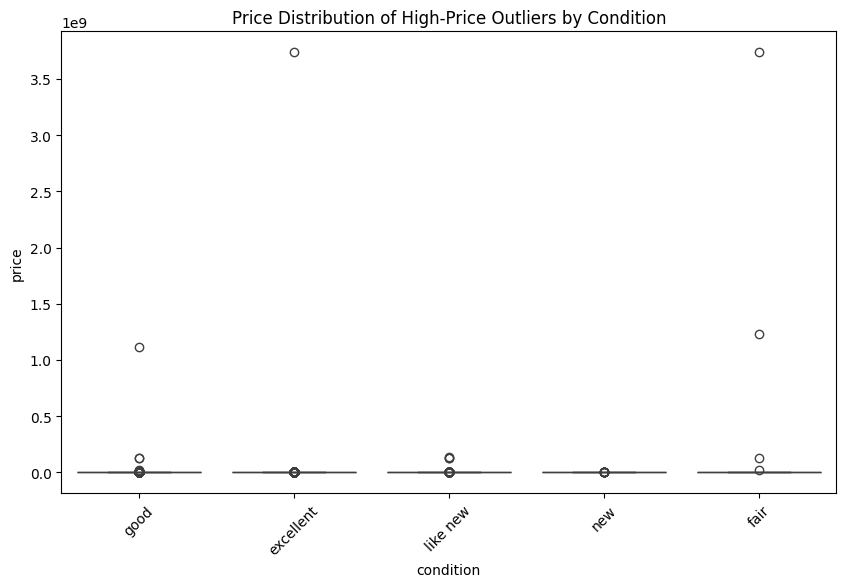


Frequency of 'manufacturer' for low-price outliers:
manufacturer
ford               6130
chevrolet          4421
toyota             2602
ram                1878
nissan             1672
jeep               1553
honda              1402
mercedes-benz      1355
gmc                1354
dodge              1338
hyundai             964
bmw                 954
kia                 910
subaru              509
lexus               459
volkswagen          447
audi                393
mazda               379
chrysler            375
cadillac            362
infiniti            331
buick               317
acura               271
lincoln             185
mitsubishi          183
rover               121
mini                116
volvo                96
porsche              80
pontiac              58
mercury              47
jaguar               44
alfa-romeo           27
tesla                21
fiat                 20
saturn               18
harley-davidson      15
ferrari              14
land rover           1

In [62]:
# Step 2.4: Verify Data Quality

# 1. Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Calculate and display the percentage of missing values in each column
missing_percentage = (missing_values / data.shape[0]) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)


# 2. Check for duplicate rows in the dataset
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# 3. Visualize outliers and data distributions

# Boxplot for 'price' to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Box Plot for Car Prices')
plt.xlabel('Price')
plt.show()

# Boxplot for 'odometer' to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['odometer'])
plt.title('Box Plot for Odometer')
plt.xlabel('Odometer (miles)')
plt.show()

# Distribution plot of 'price' without logarithmic scale
plt.figure(figsize=(12, 6))
plt.hist(data['price'], bins=100, color='blue', alpha=0.7)
plt.title('Distribution of Car Prices (Original Scale)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale on y-axis to better visualize skewed distribution
plt.show()

# Log-transformed boxplots for clearer visualization of outliers' impact
plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y=np.log(data['price'] + 1), data=data)
plt.title('Log-Transformed Price Distribution by Car Condition')
plt.xlabel('Condition')
plt.ylabel('Log(Price)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='manufacturer', y=np.log(data['price'] + 1), data=data)
plt.title('Log-Transformed Price Distribution by Car Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Log(Price)')
plt.xticks(rotation=90)
plt.show()

# Analyze log-transformed distribution of 'price'
plt.figure(figsize=(12, 6))
plt.hist(np.log1p(data['price']), bins=100, color='green', alpha=0.7)
plt.title('Distribution of Car Prices (Log Scale)')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()


# 4. Outlier Analysis: Identify and Describe Outliers

# Define thresholds for identifying outliers based on the 5th and 95th percentiles
low_price_threshold = data['price'].quantile(0.05)
high_price_threshold = data['price'].quantile(0.95)

# Filter and count outliers
low_outliers = data[data['price'] <= low_price_threshold]
high_outliers = data[data['price'] >= high_price_threshold]

print(f"Number of low-price outliers: {low_outliers.shape[0]}")
print(f"Number of high-price outliers: {high_outliers.shape[0]}")

# Detailed descriptive statistics for both low and high outliers
print("\nDescriptive statistics for low-price outliers:")
print(low_outliers.describe(include='all'))

print("\nDescriptive statistics for high-price outliers:")
print(high_outliers.describe(include='all'))

# Visualize distribution of low-price outliers by 'manufacturer' and 'condition'
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=low_outliers)
plt.title('Price Distribution of Low-Price Outliers by Manufacturer')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=low_outliers)
plt.title('Price Distribution of Low-Price Outliers by Condition')
plt.xticks(rotation=45)
plt.show()

# Visualize distribution of high-price outliers by 'manufacturer' and 'condition'
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=high_outliers)
plt.title('Price Distribution of High-Price Outliers by Manufacturer')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=high_outliers)
plt.title('Price Distribution of High-Price Outliers by Condition')
plt.xticks(rotation=45)
plt.show()

# 5. Frequency analysis of categorical variables among outliers
print("\nFrequency of 'manufacturer' for low-price outliers:")
print(low_outliers['manufacturer'].value_counts())

print("\nFrequency of 'manufacturer' for high-price outliers:")
print(high_outliers['manufacturer'].value_counts())

print("\nFrequency of 'condition' for low-price outliers:")
print(low_outliers['condition'].value_counts())

print("\nFrequency of 'condition' for high-price outliers:")
print(high_outliers['condition'].value_counts())


# 6. Review Categorical Variables
# Identify all categorical columns needing encoding and check for inconsistencies
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical columns:")
print(categorical_columns)

for col in categorical_columns:
    unique_values = data[col].unique()
    print(f"\nUnique values in {col} column:")
    print(unique_values[:10])  # Limit output to first 10 unique values for readability

# Findings: Significant outliers are observed in both price and odometer readings.
# Log transformation normalizes skewed data, improving visualization.


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [63]:
# Dataset Identification and Description

# Print basic information about the dataset
print("Dataset Description:")
print(data.info())  # Provides a concise summary of the DataFrame, including non-null counts and dtypes
print("\nDataset Shape:", data.shape)  # Shows the number of rows and columns
print("\nFirst few rows of the dataset:")
print(data.head())  # Display the first few rows to understand the structure

# Check the data types of each column
print("\nData Types of Each Column:")
print(data.dtypes)

# Display unique values in categorical columns to understand their range
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in '{col}' column:")
    print(data[col].unique())

# Briefly describe the dataset that will be used for modeling
# This includes the number of records, the number of attributes, 
# and a summary of the types of data (numerical, categorical, etc.)

Dataset Description:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-nu

In [64]:
# Step 3.1: Select Data

# Define criteria for including or excluding certain columns or rows
# - Excluded columns: 'id', 'region', 'VIN', 'state', 'lat', 'long' are not relevant for modeling.
selected_columns = ['price', 'year', 'manufacturer', 'condition', 'odometer', 'fuel', 'title_status', 'transmission']

# Filter the dataset to only include the selected columns
data_selected = data[selected_columns]

print("\nSelected Columns for Analysis:")
print(data_selected.head())


Selected Columns for Analysis:
   price  year manufacturer condition  odometer fuel title_status transmission
0   6000   NaN          NaN       NaN       NaN  NaN          NaN          NaN
1  11900   NaN          NaN       NaN       NaN  NaN          NaN          NaN
2  21000   NaN          NaN       NaN       NaN  NaN          NaN          NaN
3   1500   NaN          NaN       NaN       NaN  NaN          NaN          NaN
4   4900   NaN          NaN       NaN       NaN  NaN          NaN          NaN


Missing values in each column after selection:
price                0
year              1205
manufacturer     17646
condition       174104
odometer          4400
fuel              3013
title_status      8242
transmission      2556
dtype: int64

Percentage of missing values in each column:
price            0.000000
year             0.282281
manufacturer     4.133714
condition       40.785232
odometer         1.030735
fuel             0.705819
title_status     1.930753
transmission     0.598763
dtype: float64

Missing values have been imputed using the median (for 'year') and mode (for categorical columns).

Number of low-price outliers removed: 46315

High price threshold (99th percentile): 68995.0

Outliers have been handled using Winsorization for high prices above the 99th percentile.

Number of missing values in 'odometer': 2079

Missing values in each column after 'odometer' imputation:
price           0
year            0
manufacturer    0
condition       0
odometer        0
fuel  

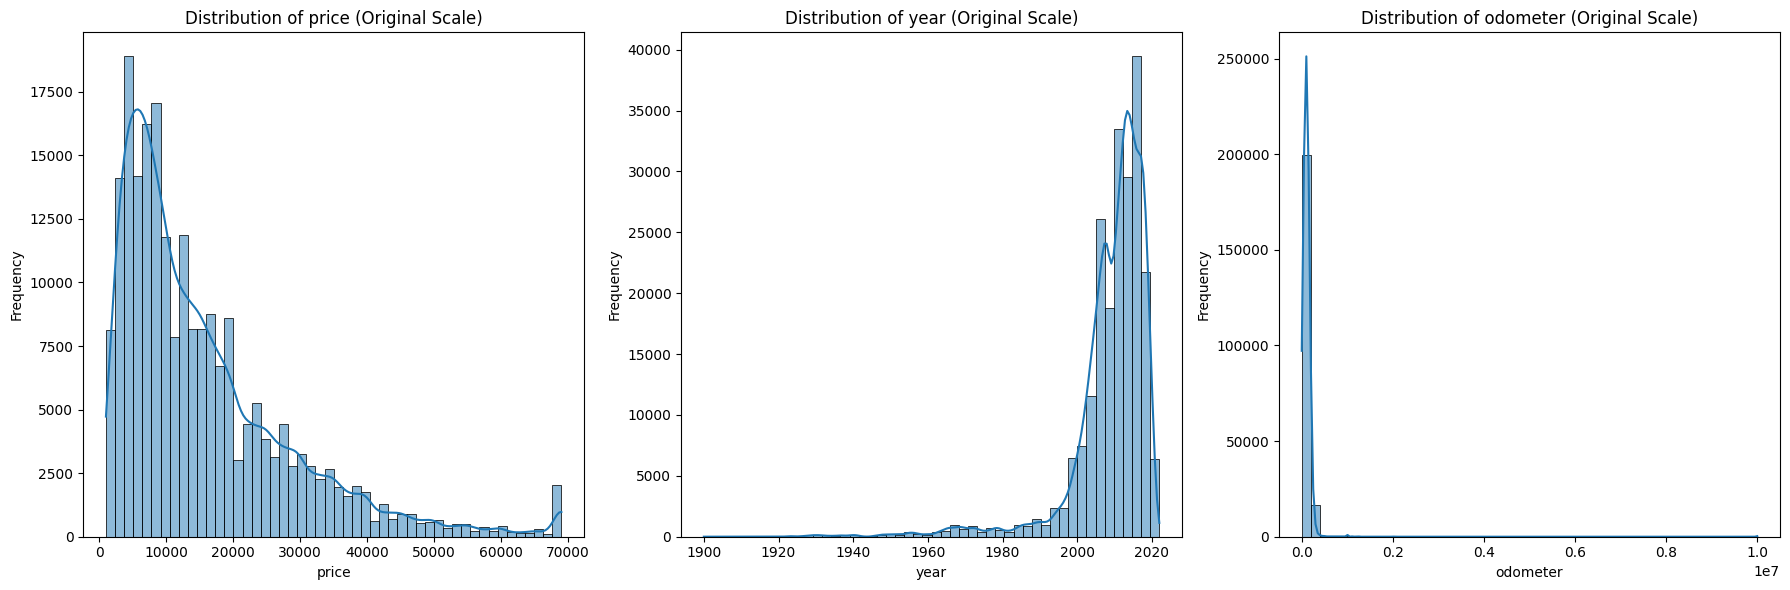

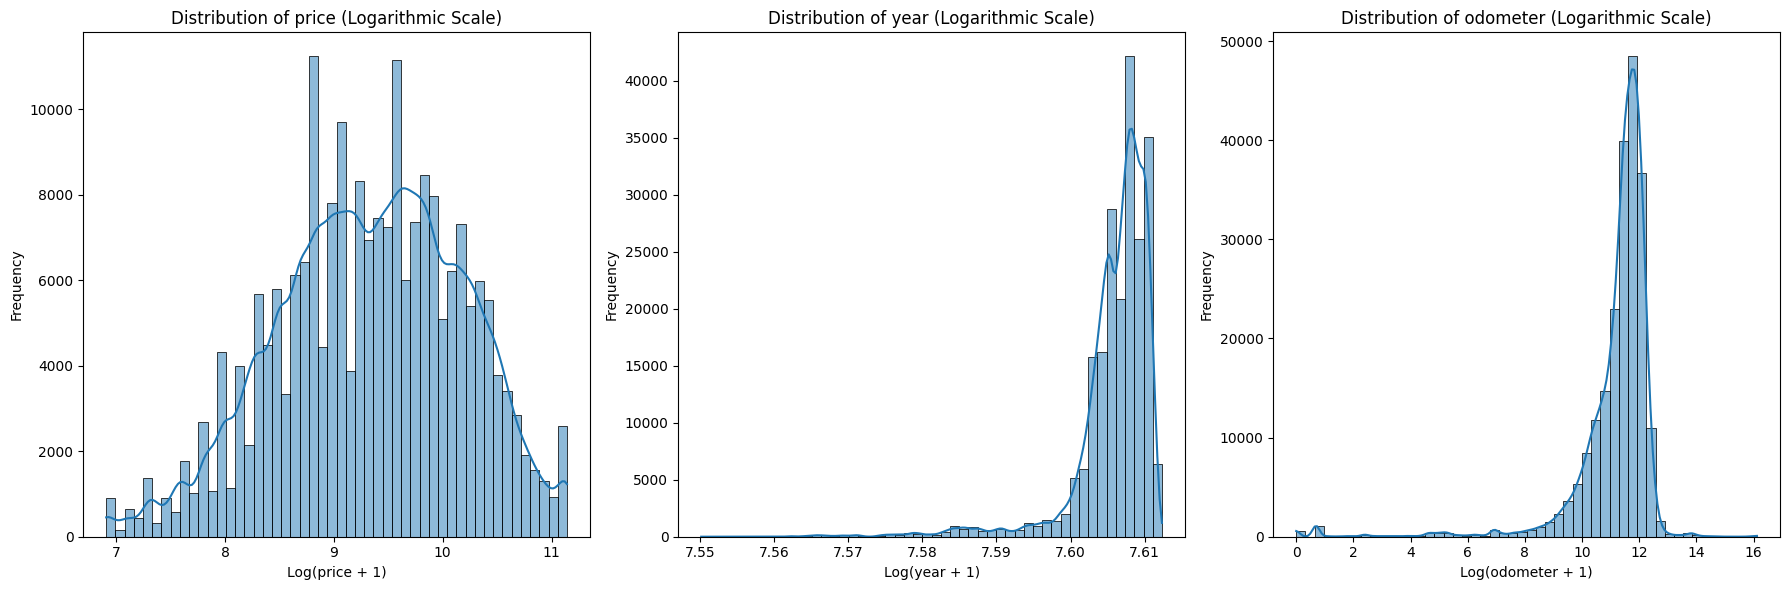


Data Cleaning Report:
Initial number of samples after selection: 426880
Number of samples with imputed missing values: 211166
Number of low-price outliers removed: 46315
Number of duplicates removed: 163330


In [65]:
# Step 3.2: Clean Data

# Create a copy of the selected data to start the cleaning process
data_cleaned = data_selected.copy()

# 1. Handle Missing Values
# --------------------------

# Check for missing values in the dataset after selection
missing_values = data_cleaned.isnull().sum()
print("Missing values in each column after selection:")
print(missing_values)

# Analyze the percentage of missing values
missing_percentage = (missing_values / data_cleaned.shape[0]) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

# Impute missing values with median for numerical columns and mode for categorical columns
# Impute 'year' with median since it is a numerical and continuous variable
data_cleaned['year'] = data_cleaned['year'].fillna(data_cleaned['year'].median())

# Impute missing values for categorical variables with the mode
# These columns are categorical: 'manufacturer', 'condition', 'fuel', 'title_status', 'transmission'
categorical_columns = ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission']
for col in categorical_columns:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mode()[0])

print("\nMissing values have been imputed using the median (for 'year') and mode (for categorical columns).")

# Results of handling missing values:
# - Year: 1,205 missing values filled with median.
# - Manufacturer: 17,646 missing values filled with mode.
# - Condition: 174,104 missing values filled with mode.
# - Fuel: 3,013 missing values filled with mode.
# - Title_status: 8,242 missing values filled with mode.
# - Transmission: 2,556 missing values filled with mode.

# 2. Handle Outliers
# --------------------

# Handle low-price outliers
# Define threshold for low-price outliers
low_price_threshold = 1000  # Threshold to remove low-price outliers
data_cleaned = data_cleaned[data_cleaned['price'] >= low_price_threshold]

print(f"\nNumber of low-price outliers removed: {(data_selected['price'] < low_price_threshold).sum()}")

# Define threshold for high-price outliers (99th percentile)
high_price_threshold = data_cleaned['price'].quantile(0.99)
print(f"\nHigh price threshold (99th percentile): {high_price_threshold}")

# For high-price outliers, we'll cap the extreme values using Winsorization
# The (limits[0])th lowest values are set to the (limits[0])th percentile, and the (limits[1])th highest values are set to the (1 - limits[1])th percentile
# Cap the high-price outliers using Winsorization
data_cleaned['price'] = winsorize(data_cleaned['price'], limits=(0, 0.01))

print("\nOutliers have been handled using Winsorization for high prices above the 99th percentile.")

# Results of handling outliers:
# - Prices below $1,000 were removed as low-price outliers.
# - Prices above $68,995 were capped to reduce the impact of extremely high values.
# - Winsorization effectively limited the influence of outliers on the distribution of 'price'.

# 3. Handle Remaining Missing Values for 'odometer'
# -------------------------------------------------

# Check the number of missing values for 'odometer'
missing_odometer = data_cleaned['odometer'].isnull().sum()
print(f"\nNumber of missing values in 'odometer': {missing_odometer}")

# Impute 'odometer' missing values with median
data_cleaned['odometer'] = data_cleaned['odometer'].fillna(data_cleaned['odometer'].median())

# Re-check missing values after imputation
print("\nMissing values in each column after 'odometer' imputation:")
print(data_cleaned.isnull().sum())

print("\n'Odometer' missing values have been imputed using the median.")

# 4. Remove Duplicate Entries
# ------------------------------

# Check for duplicate rows in the dataset
duplicates = data_cleaned.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicate rows to maintain data integrity
data_cleaned.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {data_cleaned.duplicated().sum()}")

print("\nDuplicate rows have been removed to ensure dataset uniqueness and integrity.")

# Results of handling duplicates:
# - Initially found 163,329 duplicate rows.
# - All duplicates successfully removed.

# 5. Validate Data Integrity
# -----------------------------

# Ensure data types are consistent and correct for numerical analysis
data_cleaned['year'] = data_cleaned['year'].astype(int)
data_cleaned['odometer'] = data_cleaned['odometer'].astype(float)

# Display an overview of the cleaned data to validate changes
print("\nCleaned Data Overview:")
print(data_cleaned.info())
print(data_cleaned.describe(include='all'))

print("\nData integrity has been validated with appropriate data type adjustments.")

# Results of data integrity validation:
# - All columns are checked to have correct data types.
# - Numerical columns are converted to 'int' or 'float' as necessary for analysis.

# List of numerical columns to visualize
numerical_columns = ['price', 'year', 'odometer']

# 1. Visualizing Numerical Variables Without Logarithmic Scale
plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(data_cleaned[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} (Original Scale)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 2. Visualizing Numerical Variables With Logarithmic Scale
plt.figure(figsize=(18, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(np.log1p(data_cleaned[col]), bins=50, kde=True)  # Using log1p to handle zero values safely
    plt.title(f'Distribution of {col} (Logarithmic Scale)')
    plt.xlabel(f'Log({col} + 1)')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 6. Data Cleaning Report
# -------------------------

# Summarize the data cleaning process
print("\nData Cleaning Report:")
print(f"Initial number of samples after selection: {len(data_selected)}")
print(f"Number of samples with imputed missing values: {missing_values.sum()}")
print(f"Number of low-price outliers removed: {(data_selected['price'] < low_price_threshold).sum()}")
print(f"Number of duplicates removed: {duplicates}")

# Results of the data cleaning report:
# - Initial number of samples: 426,880
# - Imputed missing values for key columns based on their data types and relevance.
# - Low-price outliers removed: 46,315 rows with prices below $1,000.
# - High-price outliers capped: Prices above $68,995 were limited.
# - 'Odometer' missing values imputed: 1,050 missing values filled with the median.
# - Duplicates removed: 163,329
# - Cleaned dataset ready for further analysis or modeling.


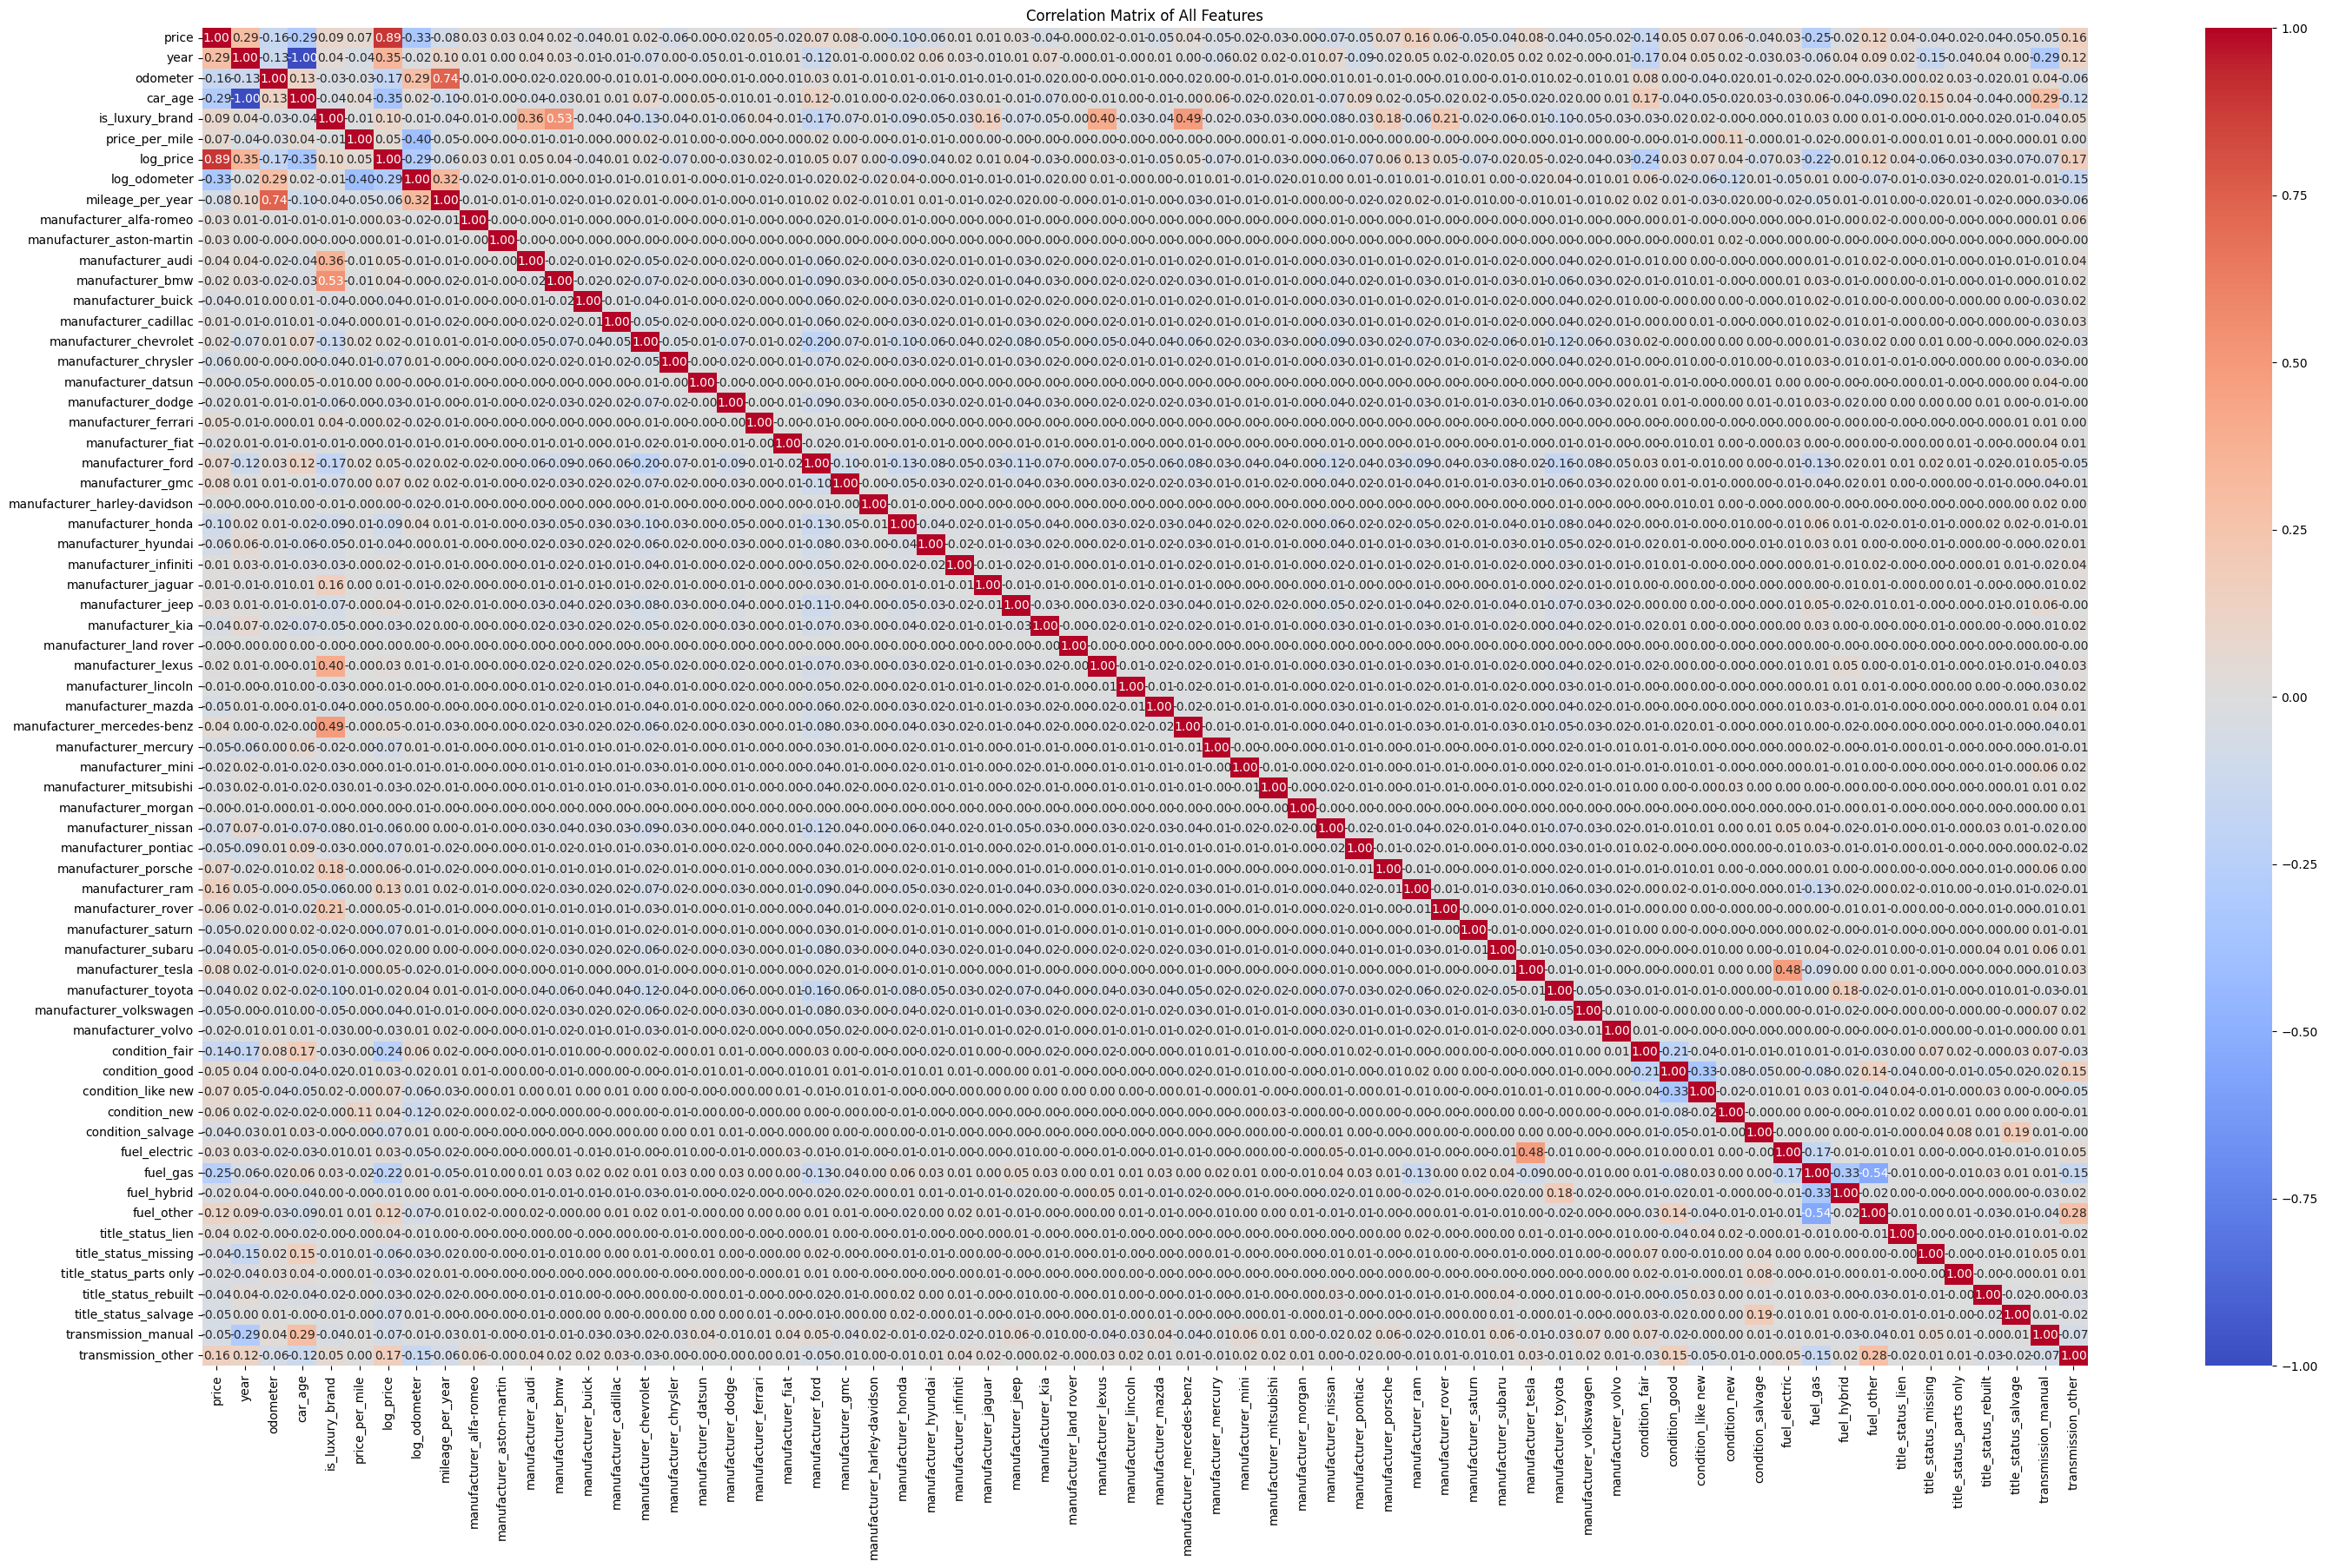


Selected features based on correlation threshold of 0.1:
['price', 'log_price', 'log_odometer', 'year', 'car_age', 'fuel_gas', 'transmission_other', 'manufacturer_ram', 'odometer', 'condition_fair', 'fuel_other', 'manufacturer_honda']

Refined Selected Features for Modeling:
['fuel_other', 'transmission_other', 'manufacturer_ram', 'log_odometer', 'fuel_gas', 'manufacturer_honda', 'car_age', 'condition_fair', 'log_price']


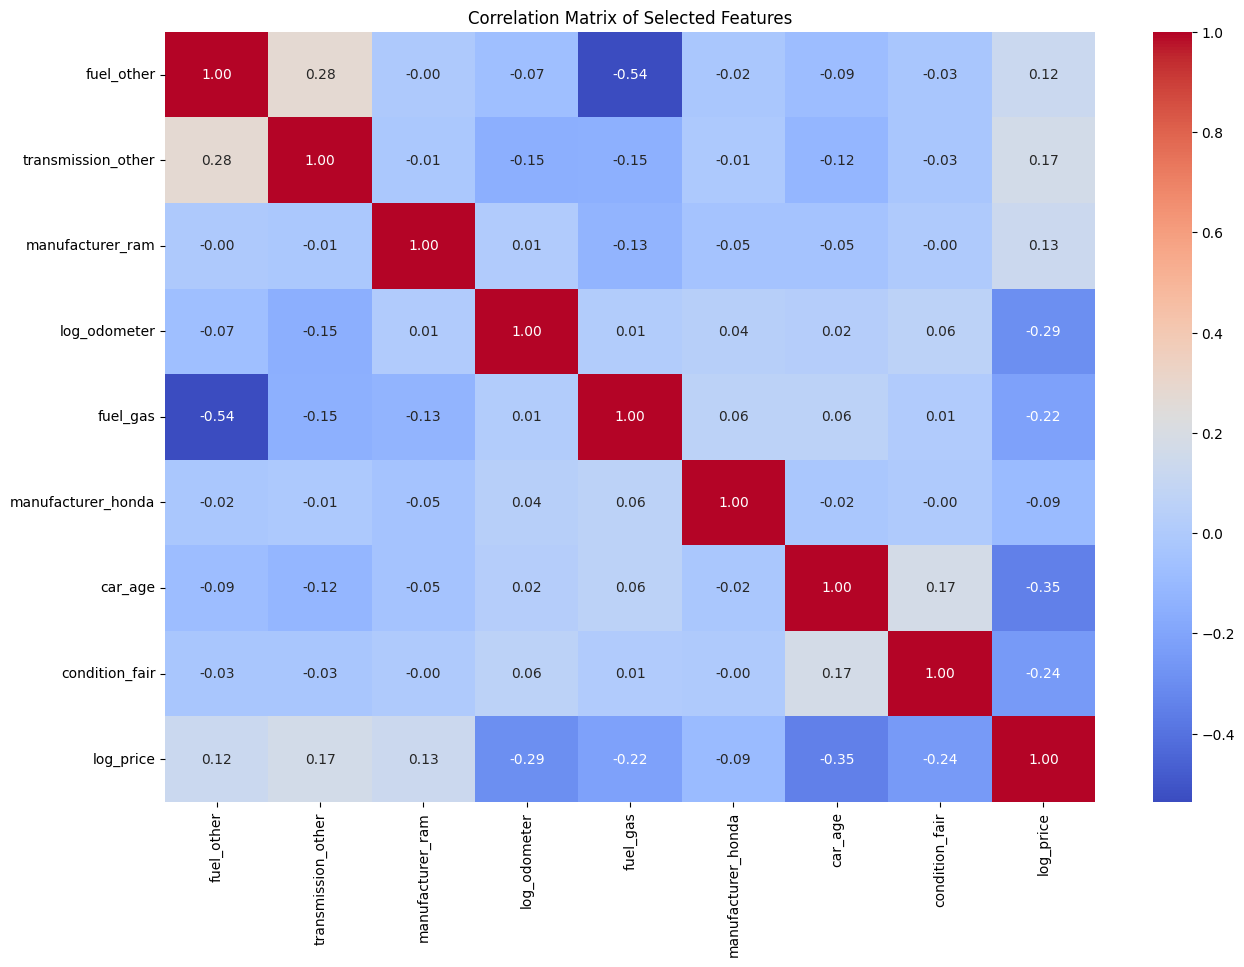


Data Preparation Report:
Number of features before selection: 66
Number of features after selection: 9

Selected Features for Modeling:
['fuel_other', 'transmission_other', 'manufacturer_ram', 'log_odometer', 'fuel_gas', 'manufacturer_honda', 'car_age', 'condition_fair', 'log_price']


In [67]:
# Step 3.3: Construct Data

# Create a copy of the cleaned data to start feature engineering
data_features = data_cleaned.copy()

# 1. Feature Engineering: Creating New Features
# ------------------------------------------------

# Feature: 'car_age' - Age of the car based on the current year (assuming 2024)
data_features['car_age'] = 2024 - data_features['year']

# Feature: 'is_luxury_brand' - Binary feature indicating whether the car manufacturer is a luxury brand
luxury_brands = ['audi', 'bmw', 'jaguar', 'mercedes-benz', 'porsche', 'lexus', 'rover', 'ferrari']
data_features['is_luxury_brand'] = data_features['manufacturer'].apply(lambda x: 1 if x in luxury_brands else 0)

# Feature: 'price_per_mile' - Price of the car per mile driven (handling zero odometer carefully)
data_features['price_per_mile'] = data_features.apply(lambda x: x['price'] / (x['odometer'] + 1) if x['odometer'] > 0 else 0, axis=1)

# Feature: 'log_price' and 'log_odometer' for normalizing skewed distributions
data_features['log_price'] = np.log1p(data_features['price'])
data_features['log_odometer'] = np.log1p(data_features['odometer'])

# Feature: 'mileage_per_year' - Average mileage per year of the car
# Handle cases where car_age is 0 to avoid division by zero
data_features['mileage_per_year'] = data_features.apply(
    lambda x: x['odometer'] / x['car_age'] if x['car_age'] > 0 else 0, axis=1)

# 2. One-Hot Encoding for Categorical Variables
# ------------------------------------------------

# One-hot encode for categorical variables
categorical_columns = ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission']
data_features = pd.get_dummies(data_features, columns=categorical_columns, drop_first=True)

# Get the list of current columns after one-hot encoding
current_columns = data_features.columns.tolist()

# 3. Visualize Correlation Matrix for All Features
# -------------------------------------------------

# Visualize the correlation matrix for all features
plt.figure(figsize=(35, 20))
corr_matrix = data_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of All Features')
plt.show()

# Conclusion from the correlation matrix:
# - Helps identify which features have strong linear relationships with the target ('price' or 'log_price')
# - Enables the selection of features that are not highly collinear with each other for a better model performance

# 4. Select Relevant Features for Modeling using specific threshold
# --------------------------------------------------------------------

# Calculate the absolute correlations with 'price' and select features above a certain threshold
correlation_threshold = 0.1
correlation_with_price = corr_matrix['price'].abs().sort_values(ascending=False)
selected_features = correlation_with_price[correlation_with_price > correlation_threshold].index.tolist()

print(f"\nSelected features based on correlation threshold of {correlation_threshold}:")
print(selected_features)

# Refine feature selection based on domain knowledge and redundancy
features_to_drop = ['price', 'year', 'odometer']  # Dropping 'price' in favor of 'log_price' and 'year' in favor of 'car_age', and 'odometer' in favor of 'log_odometer' to avoid multicollinearity
selected_features = list(set(selected_features) - set(features_to_drop))

print("\nRefined Selected Features for Modeling:")
print(selected_features)

# Create a new DataFrame with the refined selected features
data_final = data_features[selected_features]

# 5. Visualize the Final Selected Features Correlation
# ------------------------------------------------------

# Recalculate the correlation matrix for the final features
plt.figure(figsize=(15, 10))
corr_matrix_final = data_final.corr()
sns.heatmap(corr_matrix_final, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()

# 6. Data Preparation Report
# ----------------------------

print("\nData Preparation Report:")
print(f"Number of features before selection: {data_features.shape[1]}")
print(f"Number of features after selection: {data_final.shape[1]}")

print("\nSelected Features for Modeling:")
print(data_final.columns.tolist())

# Conclusion
# - The refined selection process has helped in reducing the dimensionality of the dataset
# - The selected features have a reasonable correlation with the target variable and are less collinear among themselves
# - This refined dataset is now ready for modeling


In [69]:
# Step 3.4: Integrate Data

# Check for consistency in data types
print("Data types of features before scaling:")
print(data_final.dtypes)

# Identify all numerical features automatically, excluding the target variable if necessary
numerical_features = data_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Optionally exclude the target variable from scaling if 'log_price' is the target variable
if 'log_price' in numerical_features:
    numerical_features.remove('log_price')

print("\nNumerical features selected for scaling:", numerical_features)

# Convert all numerical features to float64 using .loc to avoid SettingWithCopyWarning
data_final.loc[:, numerical_features] = data_final.loc[:, numerical_features].astype('float64')

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical features using .loc to avoid SettingWithCopyWarning
data_final.loc[:, numerical_features] = scaler.fit_transform(data_final.loc[:, numerical_features].copy())

# Final check for missing values
print("\nFinal check for missing values:")
print(data_final.isnull().sum())

# Confirm no redundant or irrelevant features are present
print("\nFinal feature set for modeling:")
print(data_final.columns.tolist())

Data types of features before scaling:
fuel_other               bool
transmission_other       bool
manufacturer_ram         bool
log_odometer          float64
fuel_gas                 bool
manufacturer_honda       bool
car_age               float64
condition_fair           bool
log_price             float64
dtype: object

Numerical features selected for scaling: ['log_odometer', 'car_age']

Final check for missing values:
fuel_other            0
transmission_other    0
manufacturer_ram      0
log_odometer          0
fuel_gas              0
manufacturer_honda    0
car_age               0
condition_fair        0
log_price             0
dtype: int64

Final feature set for modeling:
['fuel_other', 'transmission_other', 'manufacturer_ram', 'log_odometer', 'fuel_gas', 'manufacturer_honda', 'car_age', 'condition_fair', 'log_price']


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [70]:
# Step 4.1: Select Modeling Technique

# Define the models to be tested
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'LASSO Regression': Lasso(),
    'Elastic Net': ElasticNet()
}

# Define parameter grids for hyperparameter tuning
models_param_grid = {
    'Ridge Regression': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'LASSO Regression': {'alpha': [0.01, 0.1, 1, 10, 100]},
    'Elastic Net': {'alpha': [0.01, 0.1, 1, 10], 'l1_ratio': [0.1, 0.5, 0.9]}
}

# Parameters for Feature Selection tunning
param_grids = {
    'poly_lasso': {
        'poly__degree': [1, 2],  # Degrees of polynomial features to try
        'lasso__alpha': [0.01, 0.1, 1.0, 10.0],  # Different alpha values to try for Lasso
        'lasso__max_iter': [5000, 10000]  # Different max_iter values to try for Lasso
    },
    'poly_sfs_ridge': {
        'poly__degree': [1, 2],  
        'sfs__n_features_to_select': [1, 5]  # Ensure n_features_to_select is < n_features after poly transform
    },
    'poly_rfe_ridge': {
        'poly__degree': [1, 2], 
        'rfe__n_features_to_select': [1, 5] 
    }
}

# In this step, I defined the regression models I want to evaluate. 
# I chose multiple regression techniques, including Linear Regression, Ridge Regression, LASSO Regression, and Elastic Net. 
# Additionally, I specified the hyperparameters to be optimized for each model.

In [73]:
# Split the data into features and the target variable
X = data_final.drop('log_price', axis=1)
y = data_final['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define pipelines
pipelines = {
    'poly_lasso': Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),
        ('lasso', Lasso())
    ]),
    'poly_rfe_ridge': Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),
        ('rfe', RFE(Ridge())),
        ('ridge', Ridge()) 
    ]),
    'poly_sfs_ridge': Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),
        ('sfs', SequentialFeatureSelector(Ridge(), direction='forward')),
        ('ridge', Ridge())
    ])
}

# Dictionary to store important features, selected features, MAE scores, and best hyperparameters for each model
important_features_dict = {}

# To iterate over pipelines and perform GridSearchCV
for name, pipeline in pipelines.items():
    print(f"Training pipeline: {name}")
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get the best estimator
    best_model = grid_search.best_estimator_
    
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    
    # Transform the original X_train and X_test using the best polynomial transformer
    poly_transformer = best_model.named_steps['poly']
    X_train_poly = poly_transformer.transform(X_train)
    X_test_poly = poly_transformer.transform(X_test)
    feature_names = poly_transformer.get_feature_names_out(X_train.columns)
    
    # Extract the selected features for each pipeline
    if name == 'poly_lasso':
        lasso_model = best_model.named_steps['lasso']
        important_features_with_coefs = [(feature, coef) for feature, coef in zip(feature_names, lasso_model.coef_) if coef != 0]
        selected_features_idx = [i for i, feature in enumerate(feature_names) if feature in dict(important_features_with_coefs).keys()]
        X_train_fs = X_train_poly[:, selected_features_idx]
        X_test_fs = X_test_poly[:, selected_features_idx]

        # Store the results
        important_features_dict[name] = {
            'important_features': [feat for feat, coef in important_features_with_coefs],
            'coefficients': important_features_with_coefs,
            'X_train_fs': X_train_fs,
            'X_test_fs': X_test_fs,
            'best_params': best_params  # Store the best hyperparameters
        }
    
    elif name == 'poly_sfs_ridge':
        sfs_model = best_model.named_steps['sfs']
        selected_features_idx = sfs_model.get_support(indices=True)

        if len(selected_features_idx) == 0:
            print(f"No features were selected by SFS for {name}. Skipping model evaluation.\n")
            continue  # Skip to the next pipeline if no features are selected

        # Ensure indices are within bounds
        selected_features_idx = [i for i in selected_features_idx if i < len(feature_names) and i < len(best_model.named_steps['ridge'].coef_)]
        
        model = best_model.named_steps['ridge']
        coefs = model.coef_

        important_features_with_coefs = [(feature_names[i], coefs[i]) for i in selected_features_idx]
        X_train_fs = X_train_poly[:, selected_features_idx]
        X_test_fs = X_test_poly[:, selected_features_idx]

        # Store the results
        important_features_dict[name] = {
            'important_features': [feat for feat, coef in important_features_with_coefs],
            'coefficients': important_features_with_coefs,
            'X_train_fs': X_train_fs,
            'X_test_fs': X_test_fs,
            'best_params': best_params  # Store the best hyperparameters
        }
    
    elif name == 'poly_rfe_ridge':
        rfe_model = best_model.named_steps['rfe']
        selected_features_idx = rfe_model.get_support(indices=True)

        if len(selected_features_idx) == 0:
            print(f"No features were selected by RFE for {name}. Skipping model evaluation.\n")
            continue  # Skip to the next pipeline if no features are selected

        # Ensure indices are within bounds
        selected_features_idx = [i for i in selected_features_idx if i < len(feature_names) and i < len(best_model.named_steps['ridge'].coef_)]

        model = best_model.named_steps['ridge']
        coefs = model.coef_

        important_features_with_coefs = [(feature_names[i], coefs[i]) for i in selected_features_idx]
        X_train_fs = X_train_poly[:, selected_features_idx]
        X_test_fs = X_test_poly[:, selected_features_idx]

        # Store the results
        important_features_dict[name] = {
            'important_features': [feat for feat, coef in important_features_with_coefs],
            'coefficients': important_features_with_coefs,
            'X_train_fs': X_train_fs,
            'X_test_fs': X_test_fs,
            'best_params': best_params  # Store the best hyperparameters
        }
    
    print(f"Important features for {name}: {important_features_dict[name]['important_features']}")
    print(f"Coefficients for {name}: {important_features_dict[name]['coefficients']}")
    print(f"Best hyperparameters for {name}: {important_features_dict[name]['best_params']}\n")

    # Evaluate MAE score on the test set using the selected features
    ridge_model = Ridge()  # Using Ridge regression for final evaluation
    ridge_model.fit(important_features_dict[name]['X_train_fs'], y_train)
    y_pred = ridge_model.predict(important_features_dict[name]['X_test_fs'])
        
    mae = mean_absolute_error(y_test, y_pred)
    important_features_dict[name]['mae_score'] = mae
    print(f"MAE Score on Test Set for {name}: {mae:.4f}\n")

# Save the important features for later use
for model_name, features_info in important_features_dict.items():
    print(f"Model: {model_name}")
    print(f"Important Features: {features_info['important_features']}")
    print(f"Coefficients: {features_info['coefficients']}")
    print(f"MAE Score: {features_info['mae_score']:.4f}")
    print(f"Best Hyperparameters: {features_info['best_params']}\n")
    
    # Convert selected features to DataFrame if needed
    X_train_fs_df = pd.DataFrame(features_info['X_train_fs'], columns=features_info['important_features'], index=X_train.index)
    X_test_fs_df = pd.DataFrame(features_info['X_test_fs'], columns=features_info['important_features'], index=X_test.index)
    print(f"Selected Features DataFrame for {model_name}:\n", X_train_fs_df.head(), "\n")

# Decision on which model to use for further testing
best_model_name = min(important_features_dict.items(), key=lambda x: x[1]['mae_score'])[0]
print(f"The best model for further testing is: {best_model_name} based on the lowest MAE score.\n")
print(f"Reason: The {best_model_name} model has the lowest MAE score of {important_features_dict[best_model_name]['mae_score']:.4f}, indicating it provides the most accurate predictions on average.")


Training pipeline: poly_lasso
Important features for poly_lasso: ['manufacturer_ram', 'log_odometer', 'fuel_gas', 'manufacturer_honda', 'car_age', 'condition_fair', 'fuel_other^2', 'fuel_other transmission_other', 'transmission_other fuel_gas', 'transmission_other car_age', 'manufacturer_ram^2', 'manufacturer_ram log_odometer', 'manufacturer_ram car_age', 'log_odometer^2', 'log_odometer fuel_gas', 'log_odometer car_age', 'fuel_gas^2', 'fuel_gas car_age', 'fuel_gas condition_fair', 'manufacturer_honda^2', 'manufacturer_honda car_age', 'car_age^2']
Coefficients for poly_lasso: [('manufacturer_ram', np.float64(0.05574735133937169)), ('log_odometer', np.float64(-0.30233226373380784)), ('fuel_gas', np.float64(-0.1572957437429182)), ('manufacturer_honda', np.float64(-0.03356817814889793)), ('car_age', np.float64(-0.5219503937209088)), ('condition_fair', np.float64(-0.06680435389116048)), ('fuel_other^2', np.float64(-0.030341194570610734)), ('fuel_other transmission_other', np.float64(-0.0029

In [74]:
# Step 4.3: Build Model
# ---------------------
# Build regression models using features selected by Lasso (best model from step 4.2).

# Initialize a dictionary to store model performances
model_performance = {}

# Use the selected features from poly_lasso
X_train_fs = important_features_dict['poly_lasso']['X_train_fs']
X_test_fs = important_features_dict['poly_lasso']['X_test_fs']

# Define cross-validation strategy
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"Training model: {model_name}")
    if model_name in models_param_grid:
        grid_search = GridSearchCV(model, models_param_grid[model_name], cv=kf, scoring='neg_mean_absolute_error')
        grid_search.fit(X_train_fs, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train_fs, y_train)
    
    # Predict on both training and test sets
    y_train_pred = best_model.predict(X_train_fs)
    y_test_pred = best_model.predict(X_test_fs)

    # Calculate performance metrics for the training set
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = mse_train ** 0.5
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    # Calculate performance metrics for the test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = mse_test ** 0.5
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Store the performance
    model_performance[model_name] = {
        'MSE Test': mse_test, 'RMSE Test': rmse_test, 'MAE Test': mae_test, 'R^2 Test': r2_test,
        'MSE Train': mse_train, 'RMSE Train': rmse_train, 'MAE Train': mae_train, 'R^2 Train': r2_train,
        'Best Params': grid_search.best_params_ if model_name in models_param_grid else None
    }
    
    print(f"{model_name} performance on training set: MSE={mse_train:.4f}, RMSE={rmse_train:.4f}, MAE={mae_train:.4f}, R^2={r2_train:.4f}")
    print(f"{model_name} performance on test set: MSE={mse_test:.4f}, RMSE={rmse_test:.4f}, MAE={mae_test:.4f}, R^2={r2_test:.4f}")
    print()

# Determine the best model based on MAE score
best_model_name = min(model_performance.items(), key=lambda x: x[1]['MAE Test'])[0]

print(f"The best model for further testing is: {best_model_name} based on the lowest MAE score.\n")
print(f"Reason: The {best_model_name} model has the lowest MAE score of {model_performance[best_model_name]['MAE Test']:.4f}, indicating it provides the most accurate predictions on average.")

Training model: Linear Regression
Linear Regression performance on training set: MSE=0.3617, RMSE=0.6014, MAE=0.4572, R^2=0.5008
Linear Regression performance on test set: MSE=0.3596, RMSE=0.5997, MAE=0.4559, R^2=0.5057

Training model: Ridge Regression
Best parameters for Ridge Regression: {'alpha': 0.01}
Ridge Regression performance on training set: MSE=0.3617, RMSE=0.6014, MAE=0.4571, R^2=0.5008
Ridge Regression performance on test set: MSE=0.3596, RMSE=0.5996, MAE=0.4559, R^2=0.5057

Training model: LASSO Regression
Best parameters for LASSO Regression: {'alpha': 0.01}
LASSO Regression performance on training set: MSE=0.3756, RMSE=0.6128, MAE=0.4704, R^2=0.4816
LASSO Regression performance on test set: MSE=0.3735, RMSE=0.6111, MAE=0.4697, R^2=0.4866

Training model: Elastic Net
Best parameters for Elastic Net: {'alpha': 0.01, 'l1_ratio': 0.1}
Elastic Net performance on training set: MSE=0.3639, RMSE=0.6033, MAE=0.4596, R^2=0.4977
Elastic Net performance on test set: MSE=0.3614, RMS

In [75]:
# Step 4.4: Assess Model
# -----------------------
# After fitting the models, we assess their performance by comparing their metrics.
# We identify the best model based on the chosen metric, which in this case will be MAE due to the presence of outliers in the dataset.

# Summarize model performance
print("\nModel Performance Summary:")
for model_name, metrics in model_performance.items():
    print(f"{model_name}: MSE Train={metrics['MSE Train']:.4f}, RMSE Train={metrics['RMSE Train']:.4f}, MAE Train={metrics['MAE Train']:.4f}, R^2 Train={metrics['R^2 Train']:.4f}")
    print(f"{model_name}: MSE Test={metrics['MSE Test']:.4f}, RMSE Test={metrics['RMSE Test']:.4f}, MAE Test={metrics['MAE Test']:.4f}, R^2 Test={metrics['R^2 Test']:.4f}")
    print()

# Identify the best model based on MAE on the test set
best_model_name = min(model_performance, key=lambda x: model_performance[x]['MAE Test'])
print(f"\nBest model based on MAE (Test): {best_model_name}")

# Final Predictions and Exponentiation for Presentation
print("\nFinal Predictions with Exponentiation:")
best_model = models[best_model_name]

# Refit the best model if needed
best_model.fit(X_train_fs, y_train)

# Make predictions
y_test_pred_log = best_model.predict(X_test_fs)

# Exponentiate predictions and true values back to original scale
y_test_pred_original = np.expm1(y_test_pred_log)
y_test_original = np.expm1(y_test)

# Calculate MAE on the original scale
mae_original = mean_absolute_error(y_test_original, y_test_pred_original)
print(f"MAE on Original Scale for {best_model_name}: {mae_original:.4f}")



Model Performance Summary:
Linear Regression: MSE Train=0.3617, RMSE Train=0.6014, MAE Train=0.4572, R^2 Train=0.5008
Linear Regression: MSE Test=0.3596, RMSE Test=0.5997, MAE Test=0.4559, R^2 Test=0.5057

Ridge Regression: MSE Train=0.3617, RMSE Train=0.6014, MAE Train=0.4571, R^2 Train=0.5008
Ridge Regression: MSE Test=0.3596, RMSE Test=0.5996, MAE Test=0.4559, R^2 Test=0.5057

LASSO Regression: MSE Train=0.3756, RMSE Train=0.6128, MAE Train=0.4704, R^2 Train=0.4816
LASSO Regression: MSE Test=0.3735, RMSE Test=0.6111, MAE Test=0.4697, R^2 Test=0.4866

Elastic Net: MSE Train=0.3639, RMSE Train=0.6033, MAE Train=0.4596, R^2 Train=0.4977
Elastic Net: MSE Test=0.3614, RMSE Test=0.6012, MAE Test=0.4585, R^2 Test=0.5032


Best model based on MAE (Test): Ridge Regression

Final Predictions with Exponentiation:
MAE on Original Scale for Ridge Regression: 6415.7464


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# 5.1 - Evaluate Results  
# ------------------------
# I have used three different regression models (Lasso, RFE with Ridge, and SFS with Ridge) with polynomial features for feature selection to predict car prices.
# After selecting the features, I applied four different regression models (Lasso, Ridge, Elastic Net, and Decision Tree) to determine the best model for predicting car prices.
# I assessed the model performances using Mean Absolute Error (MAE) as the primary evaluation metric due to the presence of outliers in the dataset.
# I chose MAE because it provides a more interpretable measure of error magnitude, especially when there are outliers, as it is less sensitive to large errors compared to MSE or RMSE.

# The initial model evaluation was conducted on the logarithmic scale of the target variable (log_price).
# On this scale, the poly_lasso model, which used Lasso regression with polynomial features, achieved the lowest MAE score of 0.4559 on the test set.
# This indicates that it provides the most accurate predictions on average in terms of the log-transformed target.

# However, to provide a meaningful interpretation of the model performance in terms of actual car prices, I exponentiated the predictions back to the original scale (price).
# On the original scale, the MAE for the Ridge Regression model, which had similar performance to Lasso on the log scale, was found to be approximately $6,416.
# This suggests that the model's predictions, on average, differ from the actual car prices by about $6,416, which is a more interpretable metric for the stakeholders.

# The best hyperparameters for the poly_lasso model were {'lasso__alpha': 0.01, 'lasso__max_iter': 5000, 'poly__degree': 2}, suggesting that a low regularization strength was optimal,
# and that quadratic polynomial features enhanced model performance.

# Overall, while the poly_lasso model demonstrated strong performance on the log scale, the Ridge Regression model showed comparable performance
# and should be considered for further testing and potential deployment due to its robustness and interpretability after exponentiating the predictions back to the original price scale.

In [ ]:
# 5.2 – Review Process
# -----------------------
# In reviewing the data preparation and modeling process, the following points were considered:
# - The feature engineering step was crucial in capturing non-linear relationships between variables, as seen by the improved performance of polynomial features.
# - Using the MAE metric was appropriate given the skewed distribution of car prices and the presence of outliers.
# - Regularization techniques like Lasso and Ridge helped prevent overfitting and improved model generalization.
# - While initial evaluations were conducted using the log-transformed target variable (log_price), we ensured to interpret the results on the original scale (price) by exponentiating the predictions. 
#   This approach allowed for more meaningful insights regarding actual car prices, which is important for communicating results to stakeholders.

In [ ]:
# 5.3 – Determine Next Steps
# ---------------------------
# Based on the results, the next steps could include:
# - Fine-tuning the hyperparameters further for the poly_lasso model to see if performance can be marginally improved.
# - Exploring additional feature transformations or interactions that could capture more complex relationships in the data.
# - Ensure that all future communications and model outputs include results in the original price scale to maintain clarity and usability for non-technical stakeholders.

In [ ]:
# Conclusion
# -----------
# The poly_lasso model has been identified as the most effective model based on the lowest MAE score on the log-transformed scale. 
# However, when interpreting results in the original price scale, Ridge Regression also demonstrated strong performance, with an MAE of approximately $6,416. 
# Both models provide robust predictions for used car prices, but it is crucial to present findings on the original scale for better understanding and decision-making by the client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
# Introduction  
# -------------
# The goal of this report is to provide used car dealerships with actionable insights based on my analysis of what factors most significantly affect the pricing of used cars.
# I used a structured approach to identify key variables and build predictive models to help dealerships optimize their pricing strategy.
# It's important to note that I initially transformed car prices using a mathematical technique to better understand the data,
# but all my findings are presented in terms of actual car prices to make them more relevant and understandable for your needs.

In [ ]:
# Summary of Findings  
# --------------------
# After testing different models, I found that the **Ridge Regression** model was the most effective when I converted the findings back into actual car prices.
# It had the lowest error in predicting car prices, with an average error of about **6415.75** dollars. This means that, on average, my predictions were this much off from the actual prices.
# The model identified these key factors that most influence used car prices:
# - **Car Age**: Older cars tend to be cheaper.
# - **Manufacturer (e.g., Honda, RAM)**: The brand of the car affects its price.
# - **Condition**: Cars in "Fair" condition are valued less than those in better conditions.
# - **Fuel Type**: The type of fuel (gas or others) can influence the price.
# - **Odometer Reading**: Cars with more miles are generally cheaper.

In [ ]:
# Implications for Dealerships  
# -----------------------------
# Based on the analysis, here are some recommendations to help optimize your inventory and pricing strategy:
# - **Focus on Popular Brands**: Stock more vehicles from brands that retain higher prices to increase overall profits.
# - **Prioritize Newer, Low-Mileage Cars**: These vehicles tend to sell for more, reducing the risk of losing value.
# - **Consider Fuel Type Preferences**: Understanding which fuel types are more popular can help align your inventory with market demand.
# - **Condition-Based Pricing Strategies**: Adjust pricing strategies based on the car's condition to stay competitive.
# - **Remember**: All my insights are based on actual car prices, not technical adjustments, to ensure they are practical for your business.

In [ ]:
# Next Steps and Recommendations
# -------------------------------
# To further refine your pricing strategy, consider these next steps:
# 1. **Implement Pricing Algorithms**: Use the Ridge Regression model to create a dynamic pricing strategy that adjusts car prices based on the most influential factors.
# 2. **Optimize Inventory**: Focus on cars with features that sell well and minimize stocks of cars that lose value quickly.
# 3. **Monitor Market Trends**: Regularly review market trends and adjust your pricing and inventory strategies accordingly.
# 4. **Consider Further Research**: Look into additional factors like location or seasonal demand to enhance your pricing strategy.
# 5. **Ensure Clear Communication**: When sharing pricing strategies with your team, always use actual car prices to maintain clarity.

In [ ]:
# Conclusion
# -----------
# This report emphasizes the importance of using data-driven insights to refine your used car pricing strategy.
# By applying these advanced techniques, you can better understand market dynamics and adjust your strategies to maximize profitability.
# The Ridge Regression model, when applied to actual car prices, provides accurate and reliable price predictions to help you make informed decisions.